In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

In [ ]:

# Load an audio file (replace 'audio.wav' with your audio file)
metronome_file = '/home/kodagrahul/Desktop/Coding_Practice/practice/Metronome/180_reference.wav'
metronome_data, sample_rate = librosa.load(metronome_file, sr=22050)

generated_file ='/home/kodagrahul/Desktop/Coding_Practice/practice/Metronome/180_generated.wav'
generated_data, sample_rate = librosa.load(generated_file, sr=22050)

m_energy = np.square(metronome_data)
m_energy = np.abs(m_energy - np.min(m_energy)) / (np.max(m_energy) - np.min(m_energy))


g_energy = np.square(generated_data)
g_energy = np.abs(g_energy - np.min(g_energy)) / (np.max(g_energy) - np.min(g_energy))

# Set the energy threshold (adjust this value as needed)
m_threshold = 0.5  # You can change this threshold value
g_threshold = 0.1

# Create a binary signal based on the energy threshold
m_binary_energy = np.where(m_energy > m_threshold, 1, 0)
g_binary_energy = np.where(g_energy > g_threshold, 1, 0)

# Create a time axis for plotting
m_time = np.arange(len(metronome_data)) / sample_rate
g_time = np.arange(len(generated_data)) / sample_rate

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

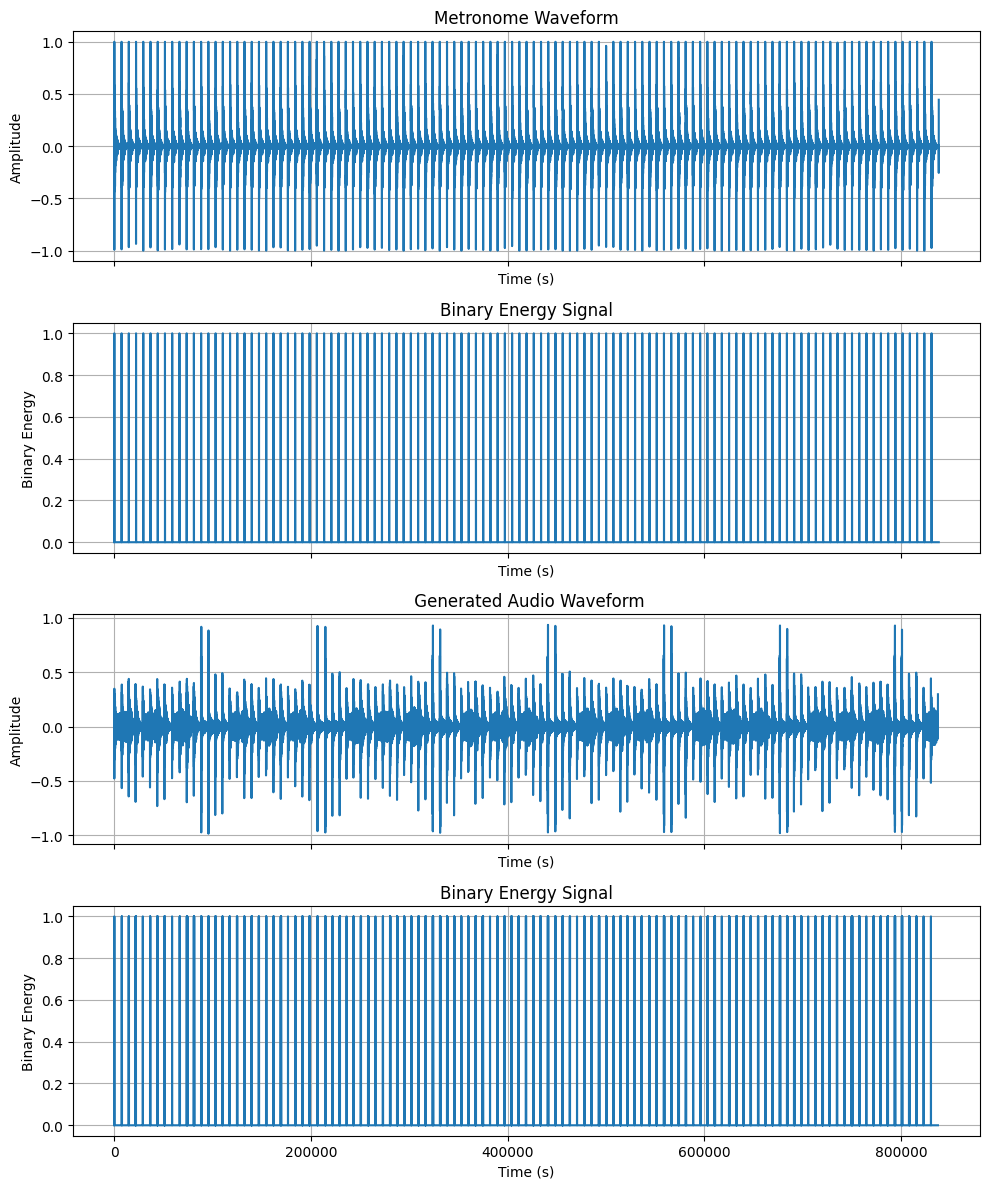

In [287]:

# Load an audio file (replace 'audio.wav' with your audio file)
metronome_file = 'Refrence metronome audiofile'
metronome_data, sample_rate = librosa.load(metronome_file, sr=22050)

generated_file ='generated audio file'
generated_data, sample_rate = librosa.load(generated_file, sr=22050)



# Calculate the energy of each sample
m_energy = np.square(metronome_data)
m_energy = np.abs(m_energy - np.min(m_energy)) / (np.max(m_energy) - np.min(m_energy))


g_energy = np.square(generated_data)
g_energy = np.abs(g_energy - np.min(g_energy)) / (np.max(g_energy) - np.min(g_energy))




# Set the energy threshold (adjust this value as needed)
m_threshold = 0.5  # You can change this threshold value
g_threshold = 0.1

# Create a binary signal based on the energy threshold
m_binary_energy = np.where(m_energy > m_threshold, 1, 0)
g_binary_energy = np.where(g_energy > g_threshold, 1, 0)


# Create a time axis for plotting
m_time = np.arange(len(metronome_data)) / sample_rate
g_time = np.arange(len(generated_data)) / sample_rate

# Create subplots
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(10, 12), sharex=True)


ax1.plot(metronome_data)

ax1.set_xlabel('Time (s)')
ax1.set_ylabel('Amplitude')
ax1.set_title('Metronome Waveform')
ax1.grid(True)

# Plot the binary energy signal in the second subplot
# ax2.plot(m_time[0:441000], m_binary_energy[0:44100])
ax2.plot(m_binary_energy)

ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Binary Energy')
ax2.set_title('Binary Energy Signal')
ax2.grid(True)

# ax3.plot(g_time[0:441000], generated_data[0:44100])
ax3.plot(generated_data)

ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Amplitude')
ax3.set_title(' Generated Audio Waveform')
ax3.grid(True)

# ax4.plot(g_time[0:441000], g_binary_energy[0:44100])
ax4.plot(g_binary_energy)

ax4.set_xlabel('Time (s)')
ax4.set_ylabel('Binary Energy')
ax4.set_title('Binary Energy Signal')
ax4.grid(True)

# Adjust subplot spacing
plt.tight_layout()

# Show the plot
plt.show()

In [288]:
## Beat selections
def process_array(arr, threshold):
    result = [arr[0]]  # Initialize the result with the first element
    
    for num in arr[1:]:
        diff = abs(num - result[-1])
        
        # Check if the difference is less than the threshold
        if diff < threshold:
            result.append(result[-1])  # Consider the first number (repeat the last element)
        else:
            result.append(num)
    return np.unique(result)


[ 1 11]


In [289]:

abc = (np.where(m_binary_energy == 1)[0])
xyz = (np.where(g_binary_energy == 1)[0])
# suv = (np.where(s_binary == 1)[0])

abc_s = (process_array(abc, 22050/18))
xyz_s = (process_array(xyz, 22050/18))
# suv_s = (process_array(suv, 22050/18))

# xyz_s = xyz_s[0:90]
abc_s = abc_s[0:388]
# suv_s = suv_s[0:111]


len(abc_s), len(xyz_s)

(114, 114)

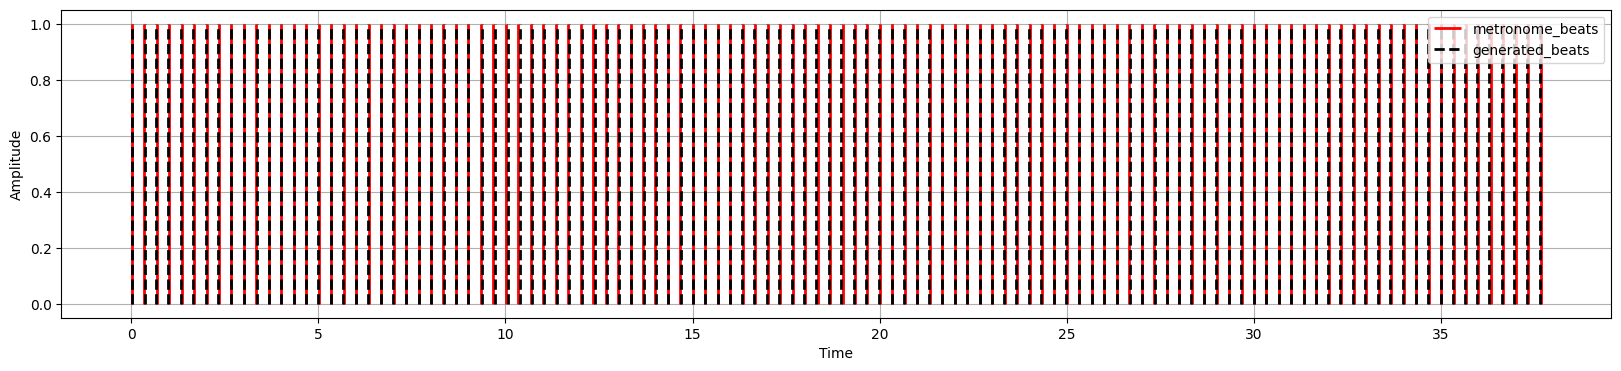

In [292]:
import numpy as np
import matplotlib.pyplot as plt

sr = 22050
# Create two arrays for x-axis indices
x1 = abc_s/sr
# x2 = suv_s/sr
x3 = (xyz_s)/sr

# Set the amplitude
amplitude = 1

plt.figure(figsize=(20, 4))

# Plot vertical lines (spikes) at the specified x-axis positions
plt.vlines(x1, 0, amplitude, label='metronome_beats', color='r', linestyle='-', linewidth=2)
# plt.vlines(x2[39:39+36], 0, amplitude, label='sensor_beats', color='b', linestyle='--', linewidth=2)
plt.vlines(x3, 0, amplitude, label='generated_beats', color='k', linestyle='--', linewidth=2)

# Add labels and a legend
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Set x-axis limits
# plt.xlim(min(min(x1), min(x2)) - 1, max(max(x1), max(x2)) + 1)

# Show the plot
plt.grid(True)
plt.show()


In [293]:
diff = (np.array(abc_s)-np.array((xyz_s)))


array([    0,  -208,   138,   488,   493,   494,   531,   573,   145,
        -288,   -99,   106,   111,   153,   346,   509,   432,   350,
         305,   264,   227,   186,    58,   -65,   -60,   -59,    96,
         257,  -399, -1019, -1066, -1149,  -792,  -442,  -487,  -528,
        -733,  -941,  -786,  -625,  -461,  -300,  -183,   -61,   -97,
         -97,    60,   182,   425,   662,   576,   494,   416,   333,
         567,   804,   768,   727,   717,   723,   564,   440,   351,
         228,   192,   151,   107,    66,    29,   -12,   297,   610,
         615,   616,   487,   364,   204,    81,    -8,  -134,  -249,
        -373,  -217,   -56,    29,   111,   101,   108,    71,    30,
          21,    27,    -9,    -8,   187,   347,   475,   596,   714,
         835,   673,   507,   293,    85,   171,   253,   409,   569,
         732,   931,   925,   884,   766,   642])

In [281]:
diff1 = np.abs(diff)
# diff1<=1577 , np.average(diff1)
np.average(diff1)

373.86842105263156

In [46]:
0.017*sr

374.85

In [282]:
max(diff1/sr), np.average(diff1/sr), np.std(diff1/sr)

(0.05210884353741497, 0.01695548394796515, 0.012849453951433925)

In [251]:

audio_data = generated_data

# Define the number of samples to shift to the left
shift_samples = 31 # Fixed shift value

# Calculate the total number of samples in the original audio
total_samples = len(audio_data)

# Create the shifted audio by shifting to the left and appending zeros to the right
shifted_audio = np.concatenate((audio_data[shift_samples:], np.zeros(shift_samples)))

# Ensure the final audio length is equal to the original length
shifted_audio = shifted_audio[:total_samples]

# Save the shifted audio
# output_file = "shifted_audio.wav"
# sf.write(output_file, shifted_audio, sample_rate)

# print(f"Audio shifted left by {shift_samples} samples and saved as {output_file}")
